<img src="../../../../images/slr.JPG" style="background:white; display: block; margin-left: auto;margin-right: auto; width:60%"/>

---
<h2>1. Importing the Dataset</h2>

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../../../../data/clean/Salary_Data.csv')
display(df.head())
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


---
<h2>2. Splitting the Dataset</h2>

In [2]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print("train dataset size : {} observations\ntest dataset size : {} observations".format(x_train.shape[0], x_test.shape[0]))

train dataset size : 24 observations
test dataset size : 6 observations


---
<h2>3. Training the Model with Training Dataset</h2>

In [3]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=-1)
slr.fit(x_train, y_train)
print("intercept : {}\nslope : {}".format(slr.intercept_, slr.coef_[0]))

intercept : 26780.09915062818
slope : 9312.575126729189


---
<h2>4. Predicting the Test Dataset Results</h2>

In [4]:
y_pred = slr.predict(x_test)
pd.DataFrame(data=np.stack((y_test.values, y_pred), axis=1),
             index=None, columns=['y actual', 'y prediction'],
             copy=False)

,y actual,y prediction
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


---
<h2>5. Visualizing the Training and Test Set Results</h2>

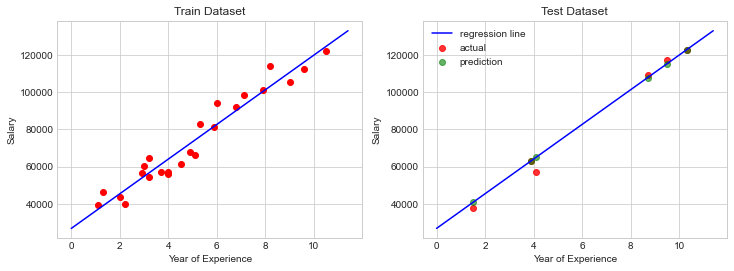

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('seaborn-whitegrid')
%matplotlib inline

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

regression_x = np.arange(0, x.max().values[0]+1, 0.1)
regression_y = [slr.intercept_ + slr.coef_[0] * i for i in regression_x]

ax[0].scatter(x_train, y_train, color='red')
ax[0].plot(regression_x, regression_y, color='blue')
ax[0].set_xlabel("Year of Experience")
ax[0].set_ylabel("Salary")
ax[0].set_title("Train Dataset")

ax[1].scatter(x_test, y_test, color='red', alpha=0.8)
ax[1].scatter(x_test, y_pred, color='green', alpha=0.6)
ax[1].plot(regression_x, regression_y, color='blue')
ax[1].legend(["regression line", "actual", "prediction"], loc="upper left")
ax[1].set_xlabel("Year of Experience")
ax[1].set_ylabel("Salary")
ax[1].set_title("Test Dataset")

plt.show()